<a href="https://colab.research.google.com/github/FridaCC1/2do-parcial-/blob/main/2doparcial_FMCC_2076471_EA42_oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Frida Michelle Cordova Castañeda

Estadistica Aplicada
2076471
Grupo 42
Octubre 2023




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from lifelines import KaplanMeierFitter, CoxPHFitter,ExponentialFitter, WeibullFitter, LogNormalFitter

In [ ]:
base=pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv")
base.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

In [ ]:
base['cantidad'].mean()

3271.258

In [ ]:
print(f"la base de datos tiene un total de 21 variables y 100 observaciones")

la base de datos tiene un total de 21 variables y 100 observaciones


In [ ]:
print(f"el monto promedio de los prestamos otorgados es 3271.258")

el monto promedio de los prestamos otorgados es 3271.258


In [ ]:
print(f"el tiempo promedio que se tardaron en pagar el prestamo los que pagaron el prestamo en su totalidad es de {df[df['credito_pagado']==1]['meses'].mean()}")

el tiempo promedio que se tardaron en pagar el prestamo los que pagaron el prestamo en su totalidad es de 19.207142857142856


In [ ]:
print(f"la tasa de interes promedio es de {base['tasa_de_interes'].mean()}%")

la tasa de interes promedio es de 2.973%


In [ ]:
print(f"El monto promedio de los que ya pagaron es de {base[base['credito_pagado']==1]['cantidad'].mean().round(3)} euros")
print(f"La tasa de interes promedio de los que ya pagaron es de {base[base['credito_pagado']==1]['tasa_de_interes'].mean()}%")

El monto promedio de los que ya pagaron es de 2985.457 euros
La tasa de interes promedio de los que ya pagaron es de 2.92%


In [ ]:
print(f"El monto promedio de los que no han pagado es de {base[base['credito_pagado']==0]['cantidad'].mean().round(3)} euros")
print(f"La tasa de interes promedio de los que no han pagado es de {base[base['credito_pagado']==0]['tasa_de_interes'].mean().round(3)}%")

El monto promedio de los que no han pagado es de 3938.127 euros
La tasa de interes promedio de los que no han pagado es de 3.097%


In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bcc3b41f000b9ad10e075bad5ce8552512c4484abea84407e88d75ddfc4e67e1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
km=KaplanMeierFitter().fit(base['meses'],base['credito_pagado'])
km.median_survival_time_

24.0

La mediana del tiempo significa que se espera que la mitad de los pagos se realicen antes de los 24 meses de realizado el prestamo

La mediana promedio el modelo Kaplan-Meier es mayor que el tiempo promedio que tardaron en pagar los que pagaron el credito en su totalidad

# 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo


In [ ]:
exponen= ExponentialFitter().fit(base['meses'],base['credito_pagado'])
mweibull=WeibullFitter().fit(base['meses'],base['credito_pagado'])
mlogn=LogNormalFitter().fit(base['meses'],base['credito_pagado'])
print('exponencial:',exponen.AIC_.round(2), 'mweibull:', mweibull.AIC_.round(2), 'lognormal:', mlogn.AIC_.round(2))

exponencial: 6157.19 mweibull: 5900.98 lognormal: 5813.75


# el mejor modelo es log normal, por lo que se graficara

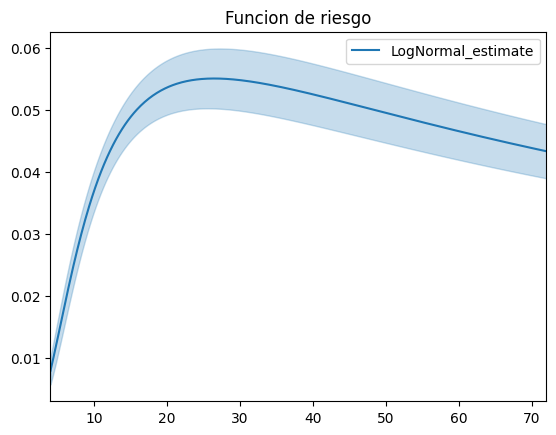

In [ ]:
mlogn.plot_hazard()
plt.title('Funcion de riesgo')
plt.xlim(4,72)
plt.show()

In [ ]:
ries= mlogn.hazard
ries= ries.reset_index().rename(columns={'index':'Meses'})

for i in range(1,len(ries['LogNormal_estimate'])):
     if (riesgo['Lognormal_estimate'][i]>ries['LogNormal_estimate'][i+1]):
        break
print(f'El riesgo de que el prestamo se pague en su totalidad es de tipo log normal, siendo crecient desde {min(ries['Meses'])} hasta {ries['Meses'][i].round(2)}\nY decreciente desde {ries['Meses'][i].round(2)} hasta {max(ries['Meses'])}')

SyntaxError: ignored

## 4


In [ ]:
base["saldo_cuenta_ahorro"].unique()

array([nan, 'menor_100', '500_a_1000', 'mas_de_1000', '100_a_500'],
      dtype=object)

In [ ]:
base["historia_crediticia"].unique()

array(['no_ha_pagado', 'pago_algun_credito', 'pago_retrasado',
       'sin_creditos', 'pago_todos'], dtype=object)

In [ ]:
base["uso"].unique()

array(['TV', 'colegiaturas', 'mobiliario', 'coche_nuevo', 'coche_usado',
       'poner_negocio', 'utensilios_hogar', 'reparaciones', 'otros',
       'reestructuración'], dtype=object)

In [ ]:
base["activos"].unique()

array(['bienes_raices', 'seguro_vida', 'sin_activos', 'otro_tipo'],
      dtype=object)

para estimar el modelo de Cox utilizare las variables:
1. **tasa_de_interes:** muestra el interes del prestamo en %
2. **cantidad:** muestra la cantidad prestada en euros
3. **saldo_cuenta_ahorro:** muestra la cantidad que tiene en su cuenta de ahorro en euros
4. **historia_crediticia:** muestra el historial crediticio del individuo
5. **uso:** muestra el uso que le dio al credito
6. **activos:** muestra los activos que posee el prestatario

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
base2=base[["meses","credito_pagado","tasa_de_interes","cantidad","saldo_cuenta_ahorro","historia_crediticia","uso","activos"]]
base2.isnull().sum()

meses                    0
credito_pagado           0
tasa_de_interes          0
cantidad                 0
saldo_cuenta_ahorro    183
historia_crediticia      0
uso                      0
activos                  0
dtype: int64

la variable **saldo_cuenta_ahorro** tiene 183 valores nulos, lo que podemos interpretar como personas que no tienen cuenta de ahorro, cambiare los valores nulos por "sin_cuenta"

In [ ]:
base2["saldo_cuenta_ahorro"]=base2["saldo_cuenta_ahorro"].fillna("sin_cuenta")
base2

<ipython-input-38-fe4122b025e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base2["saldo_cuenta_ahorro"]=base2["saldo_cuenta_ahorro"].fillna("sin_cuenta")


,meses,credito_pagado,tasa_de_interes,cantidad,saldo_cuenta_ahorro,historia_crediticia,uso,activos
0,6,1,4,1169,sin_cuenta,no_ha_pagado,TV,bienes_raices
1,48,0,2,5951,menor_100,pago_algun_credito,TV,bienes_raices
2,12,1,2,2096,menor_100,no_ha_pagado,colegiaturas,bienes_raices
3,42,1,2,7882,menor_100,pago_algun_credito,mobiliario,seguro_vida
4,24,0,3,4870,menor_100,pago_retrasado,coche_nuevo,sin_activos
...,...,...,...,...,...,...,...,...
995,12,1,3,1736,menor_100,pago_algun_credito,mobiliario,bienes_raices
996,30,1,4,3857,menor_100,pago_algun_credito,coche_usado,seguro_vida
997,12,1,4,804,menor_100,pago_algun_credito,TV,otro_tipo
998,45,0,4,1845,menor_100,pago_algun_credito,TV,sin_activos


In [ ]:
base2.isnull().sum()

meses                  0
credito_pagado         0
tasa_de_interes        0
cantidad               0
saldo_cuenta_ahorro    0
historia_crediticia    0
uso                    0
activos                0
dtype: int64

In [ ]:
base2.duplicated().sum()

0

In [ ]:
base2.dtypes

meses                   int64
credito_pagado          int64
tasa_de_interes         int64
cantidad                int64
saldo_cuenta_ahorro    object
historia_crediticia    object
uso                    object
activos                object
dtype: object

In [ ]:
base2=pd.get_dummies(base2,columns=["saldo_cuenta_ahorro","historia_crediticia","uso","activos"],dtype=int)
base2.head()

,meses,credito_pagado,tasa_de_interes,cantidad,saldo_cuenta_ahorro_100_a_500,saldo_cuenta_ahorro_500_a_1000,saldo_cuenta_ahorro_mas_de_1000,saldo_cuenta_ahorro_menor_100,saldo_cuenta_ahorro_sin_cuenta,historia_crediticia_no_ha_pagado,...,uso_mobiliario,uso_otros,uso_poner_negocio,uso_reestructuración,uso_reparaciones,uso_utensilios_hogar,activos_bienes_raices,activos_otro_tipo,activos_seguro_vida,activos_sin_activos
0,6,1,4,1169,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,48,0,2,5951,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12,1,2,2096,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,42,1,2,7882,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,24,0,3,4870,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
base2=base2.drop(columns=["saldo_cuenta_ahorro_sin_cuenta","historia_crediticia_no_ha_pagado","uso_otros","activos_otro_tipo"])
base2.head()

,meses,credito_pagado,tasa_de_interes,cantidad,saldo_cuenta_ahorro_100_a_500,saldo_cuenta_ahorro_500_a_1000,saldo_cuenta_ahorro_mas_de_1000,saldo_cuenta_ahorro_menor_100,historia_crediticia_pago_algun_credito,historia_crediticia_pago_retrasado,...,uso_coche_usado,uso_colegiaturas,uso_mobiliario,uso_poner_negocio,uso_reestructuración,uso_reparaciones,uso_utensilios_hogar,activos_bienes_raices,activos_seguro_vida,activos_sin_activos
0,6,1,4,1169,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,48,0,2,5951,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,1,2,2096,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,42,1,2,7882,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,24,0,3,4870,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
cph=CoxPHFitter().fit(base2,"meses","credito_pagado")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4015.59
         time fit was run = 2023-10-08 01:59:22 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
tasa_de_interes                         -0.42       0.66       0.04            -0.50            -0.35                 0.61                 0.71
cantidad                                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
saldo_cuenta_ahorro_100_a_500           -0.23       0.79       0.15            -0.52             0.06                 0.59                 1.06
saldo_cuenta_ahorro_500_a_1000          -0.02       0.98       0.16            -0.34             0.30                 0.71                 1.35
saldo_cuenta_ahorro_mas_de_1000          0.01       1.01       0.18            -0.34             0.37                 0.71                 1.44
saldo_cuenta_ahorro_menor_100           -0.31       0.73       0.10            -0.51            -0.12                 0.60                 0.89
historia_crediticia_pago_algun_credito  -0.42       0.66       0.09            -0.59            -0.25                 0.55                 0.78
historia_crediticia_pago_retrasado      -0.44       0.65       0.15            -0.73            -0.14                 0.48                 0.87
historia_crediticia_pago_todos          -0.99       0.37       0.23            -1.45            -0.54                 0.23                 0.59
historia_crediticia_sin_creditos        -0.92       0.40       0.27            -1.46            -0.38                 0.23                 0.68
uso_TV                                  -0.29       0.75       0.39            -1.05             0.48                 0.35                 1.62
uso_coche_nuevo                         -0.32       0.73       0.39            -1.09             0.45                 0.34                 1.57
uso_coche_usado                          0.06       1.06       0.40            -0.72             0.84                 0.49                 2.32
uso_colegiaturas                        -0.38       0.68       0.43            -1.22             0.46                 0.30                 1.58
uso_mobiliario                          -0.29       0.75       0.40            -1.07             0.49                 0.34                 1.63
uso_poner_negocio                       -0.57       0.57       0.40            -1.36             0.23                 0.26                 1.26
uso_reestructuración                     0.78       2.17       0.53            -0.26             1.81                 0.77                 6.13
uso_reparaciones                        -0.22       0.80       0.47            -1.14             0.70                 0.32                 2.01
uso_utensilios_hogar                    -0.31       0.73       0.52            -1.34             0.71                 0.26                 2.04
activos_bienes_raices                    0.40       1.49       0.10             0.21             0.59                 1.23                 1.81
activos_seguro_vida                      0.14       1.15       0.11            -0.07             0.35                 0.94                 1.42
activos_sin_activos                     -0.07       0.93       0.13            -0.33             0.19                 0.72                 1.21

                                         cmp to      z      p   -log2(p)
covariate                                                               
tasa_de_interes            

1. el p value de **tasa_de_interes** < 0.05...
2. el p value de **cantidad**...
3. el p value de **saldo_cuenta_ahorro_menor_100** < 0.05, se rechaza H0, entonces se concluye que el saldo de la cuenta de ahorro sea menor que 100. Entonces se reduce el riesgo de que el prestamo se pague en su totalidad en un 27% en comparacion de un deudor que no tiene una cuenta de ahorro.
4. el p value de **historia_crediticia_pago_algun_credito** < 0.05, se rechaza H0, entocnes se dice que el prestatario haya pagado alguna vez un prestamo en su totalidad reduce el riesgo de que el prestamo no se pague completo en un 34% en comparacion de un prestatario que nunca ha pagado un prestamo.
5. el p value de **historia_crediticia_pago_retrasado*
* < 0.05, como rechazamos H0 podemos decir, que el prestatario haya realizado el pago retrasado de un prestamo en su totalidad reduce el riesgo de que el prestamo no se pague completo en un 35% en comparacion de un prestatario que nunca ha pagado un prestamo.
6. el p value de **historia_crediticia_pago_todos** < 0.05, como rechazamos H0 podemos decir, que el prestatario haya realizado el pago de todos los prestamos en su totalidad reduce el riesgo de que el prestamo no se pague completo en un 67%, vs con un deudor que nunca haya pagado un prestamo.
7. el p value de **historia_crediticia_sin_creditos** < 0.05, ya que se rechaza H0 concluimos  que el prestatario que no ha solicitado un prestamo, reduce el riesgo de que el prestamo no se pague en su totalidad en un 60% vs con un deudor que nunca ha pagado un prestamo completo.
8. el p value de **activos_bienes_raices** < 0.05, ya que rechazamos H0 concluimos que el prestatario cuente con bienes raices como activos aumenta el riesgo un 49% en comparacion con un deudor que tiene activos de otro tipo.